In [1]:
!ls data

codeCopyGitHub_nwbsharing	  converted_nwb_data  NativeData.zip
codeCopyGitHub_nwbsharing.tar.gz  NativeData


In [2]:
import os

In [3]:
import RutishauserLabtoNWB as RLab

In [4]:
path_to_native_data=os.path.join(os.getcwd(),"data/NativeData") #download native data from https://osf.io/cd6qp/

#### Exporting data into NWB:N

In [5]:
RLab.NO2NWB_export(path_to_native_data)

Where do you want to save NWB files to (no need to put quotes): data/converted_nwb_files
Sorry, this file [data/converted_nwb_files] does not exist, try again
Where do you want to save NWB files to (no need to put quotes): data/converted_nwb_data
session use: 5
age: 55
epilepsy_diagnosis: Right Mesial Temporal


/media/kacha_nimbu/04365D13365D0758/gsoc/.gsoc/lib/python3.6/site-packages/pynwb/file.py:690: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")


The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P9HMH_NOID5.nwb
session use: 6
age: 55
epilepsy_diagnosis: Right Mesial Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P9HMH_NOID6.nwb
session use: 7
age: 37
epilepsy_diagnosis: Left Lateral Frontal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P10HMH_NOID7.nwb
session use: 9
age: 16
epilepsy_diagnosis: Right Lateral Frontal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P11HMH_NOID9.nwb
session use: 17
age: 31
epilepsy_diagnosis: Bilateral Independent Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P14HMH_NOID17.nwb
session use: 18
age: 31
epilepsy_diagnosis: Bilateral Independent Temporal
The length of the new old label: 150
Successfully written this file: data/converted_nwb_data/P14HMH_NOID18.

Successfully written this file: data/converted_nwb_data/P26CS_NOID66.nwb
session use: 67
age: 44
epilepsy_diagnosis: Left Mesial Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P27CS_NOID67.nwb
session use: 68
age: 57
epilepsy_diagnosis: Right Mesial Temporal
cell mat file not found
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P44HMH_NOID68.nwb
session use: 69
age: 19
epilepsy_diagnosis: Left Neocortical Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P29CS_NOID69.nwb
session use: 70
age: 19
epilepsy_diagnosis: Left Neocortical Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P29CS_NOID70.nwb
session use: 73
age: 32
epilepsy_diagnosis: Left Neocortical Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P31CS_NOID73.nwb
session use

The length of the new old label: 197
Session 123
Successfully written this file: data/converted_nwb_data/P53CS_NOID123.nwb
session use: 124
age: 59
epilepsy_diagnosis: Right Mesial Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P54CS_NOID124.nwb
session use: 125
age: 59
epilepsy_diagnosis: Right Mesial Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P54CS_NOID125.nwb
session use: 126
age: 59
epilepsy_diagnosis: Right Mesial Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P54CS_NOID126.nwb
session use: 127
age: 43
epilepsy_diagnosis: Right Mesial Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_data/P55CS_NOID127.nwb
session use: 128
age: 48
epilepsy_diagnosis: Bilateral Independent Temporal
The length of the new old label: 200
Successfully written this file: data/converted_nwb_d

The raw data's size was 67.2Mb, and the converted data has 87 .wb files, totalling 6.2 Gb. Let's dig more into the code and analyse what just happened

### Understanding the code

The function called is RLab.NO2NWB_export(path_to_native_data), and can be found in RutishauserLabtoNWB/events/newolddelay/python/export/no2nwb_main.py , the definition can be divided into certain sections to see what's happening

In [ ]:
#  Set the Path to save the NWB files
pathToNWBfiles = input('Where do you want to save NWB files to (no need to put quotes): ')
while (os.path.exists(pathToNWBfiles)) < 1:
    print('Sorry, this file [{}] does not exist, try again'.format(pathToNWBfiles))
    pathToNWBfiles = input('Where do you want to save NWB files to (no need to put quotes): ')

In [ ]:
# Get .ini file path
subjects_ini = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(no2nwb.__file__))),
                                'defineNOsessions_release.ini')
if not os.path.exists(subjects_ini):
    print('This file does not exist: {}'.format(subjects_ini))

#### .ini file

let's see what this .ini file has. can be found @ recogmem-release-NWB/RutishauserLabtoNWB/events/newolddelay/defineNOsessions_release.ini

The file has data about recording sessions, like age , sex, id, filename(of an nwb file) for different sessions

In [ ]:
# Create the NWB file and extract data from the original data format
NOdata = data.NOData(path_to_data, subjects_ini)

NOdata is a class, with definition in recogmem-release-NWB/RutishauserLabtoNWB/events/newolddelay/python/export/data.py

Basically it loads the metadata from .ini and encapsulates it. 

The metadata here refers to the type of data present in .ini file, which was talked about earlier, like age, sex etc.

In [ ]:
for session_nr in NOdata.sessions.keys():

    nwbfile = no2nwb.no2nwb(NOdata, session_nr, subjects_ini, path_to_data)

    len_new_old_labels = len(np.asarray(nwbfile.trials['new_old_labels_recog']))
    wrong_sessions = []
    print('The length of the new old label: {}'.format(len_new_old_labels))
    if (len_new_old_labels != 200) & (len_new_old_labels != 150):
        print('Session ' + str(session_nr))
        wrong_sessions.append(session_nr)
        logging.warning('The length of the label data is not either 200 or 150: ' + 'Session ' + str(session_nr))

    # Export and write the nwbfile
    session_name = NOdata.sessions[session_nr]['filename']

    # Check File Outputs
    outputFilePath = os.path.join(pathToNWBfiles, session_name)

    io = NWBHDF5IO(outputFilePath, mode='w')
    io.write(nwbfile, cache_spec = False)
    io.close()
    print('Successfully written this file: {}'.format(outputFilePath))

Analysis of the for loop:
no2nwb.no2nwb function can be found in recogmem-release-NWB/RutishauserLabtoNWB/events/newolddelay/python/export/no2nwb.py
Most of the work is done using this function. 
Steps done in the function ->
1. Time scaling. Time unit is converted to seconds
2. "NO data" is prepared, i.e., data from the NOData class object is extracted.
Notably, events and cell_ids are obtained using methods coded in NOData class.
While extracting cell_ids, scipy.io.loadmat is used to load brain_area files, and data from those is used to make cell_ids list. In a similar fashion, events are loaded from matlab files with corresponding experiment numbers. We will dig more into these matlab files later.
3. Metadata for each session is loaded from .ini file.
4. Now, standardisation is done using pynwb package, first nwb_subject variable is created, which holds information for the Subject whose data is being talked about. Subject from pynwb.file is used for this purpose, and parameters like age, description, sex, species and subject_id are passed to obtain an object of Subject class. Note that DOB, genotype, weight could also have been added to the arguments had they been available in the data
5. Object of pynwb.file.NWBFile is created. Class NWBFile inherits MultiContainerInterface. Notice the parameters passed. These include session_description, identifier, session_start_time, file_create_date, experiment_description, institution, keywords, related publications, lab, subject(nwb_subject object created earlier), data_collection, 6.events_description (this contains a description of TTL markers) variable is created. Then, event_ts, a variable of pynwb.misc.AnnotationSeries object. The events variable introduce in #2 is used here, with it supplying the timestamps and the values for series. The events_description variable is also a variable supplied for the creation of the object.
events_ts and experiment_ids are added to NWBFile object using add_acquisition object.
6. Adding stimuli to NWB File. Stimuli recog and learn paths are extracted from NOData object, after extracting the forst cell from the cell list.
7. Trial Table for storing metadata of each of the trial. These are created using nwbfile.add_trial_column .
8. Event timestamps are extracted.
9. nwbfile.add_trial is used to add these trials to the nwbfile object. The variables supplied are start_time, stop_time, stim_on_time, stim_off_time, delay1_time, delay2_time, stim_phase, stimCategory, category_name, external_image_file, new_old_labels_recog, response_value, response_time.
10. Stimuli learn and recog images are read, resized to (300,400) using cv2.
11. Brain are file is loaded, and unit data is extracted by iterating over channel_ids.
12. Information about electrode and electrode group is read.
13. Waveform sampling rate is added.
14. Units are added to the nwbfile object
15. NWBHDF5IO from pynwb is used to write to final file.


### Understanding the formats. Proprietary vs NWB

#### Source Data Structure and Files
1) The stimuli (pictures) shown to subjects.
2) Behavioral Responses (choices, reaction times)
3) NEV (Neuralynx event) files that indicate event markers(TTLs)
4) Spike times and waveforms from the OSort spike sorting software (‘Ax_cells.mat’ files, where x is the channel number)
5) Information from the raw CSC (Continuously Sampled Channel) Neuralynx files.
Customized code for reading these files, then usage of pynwb APIs to export.

#### NWB File Structure

In [2]:
!ls

data		     nwb-file-struct.png  requirements.txt
data_analysis.ipynb  README.md		  RutishauserLabtoNWB


In [1]:
import cv2
struct_image=cv2.imread("pictures/nwb-file-struct.png")

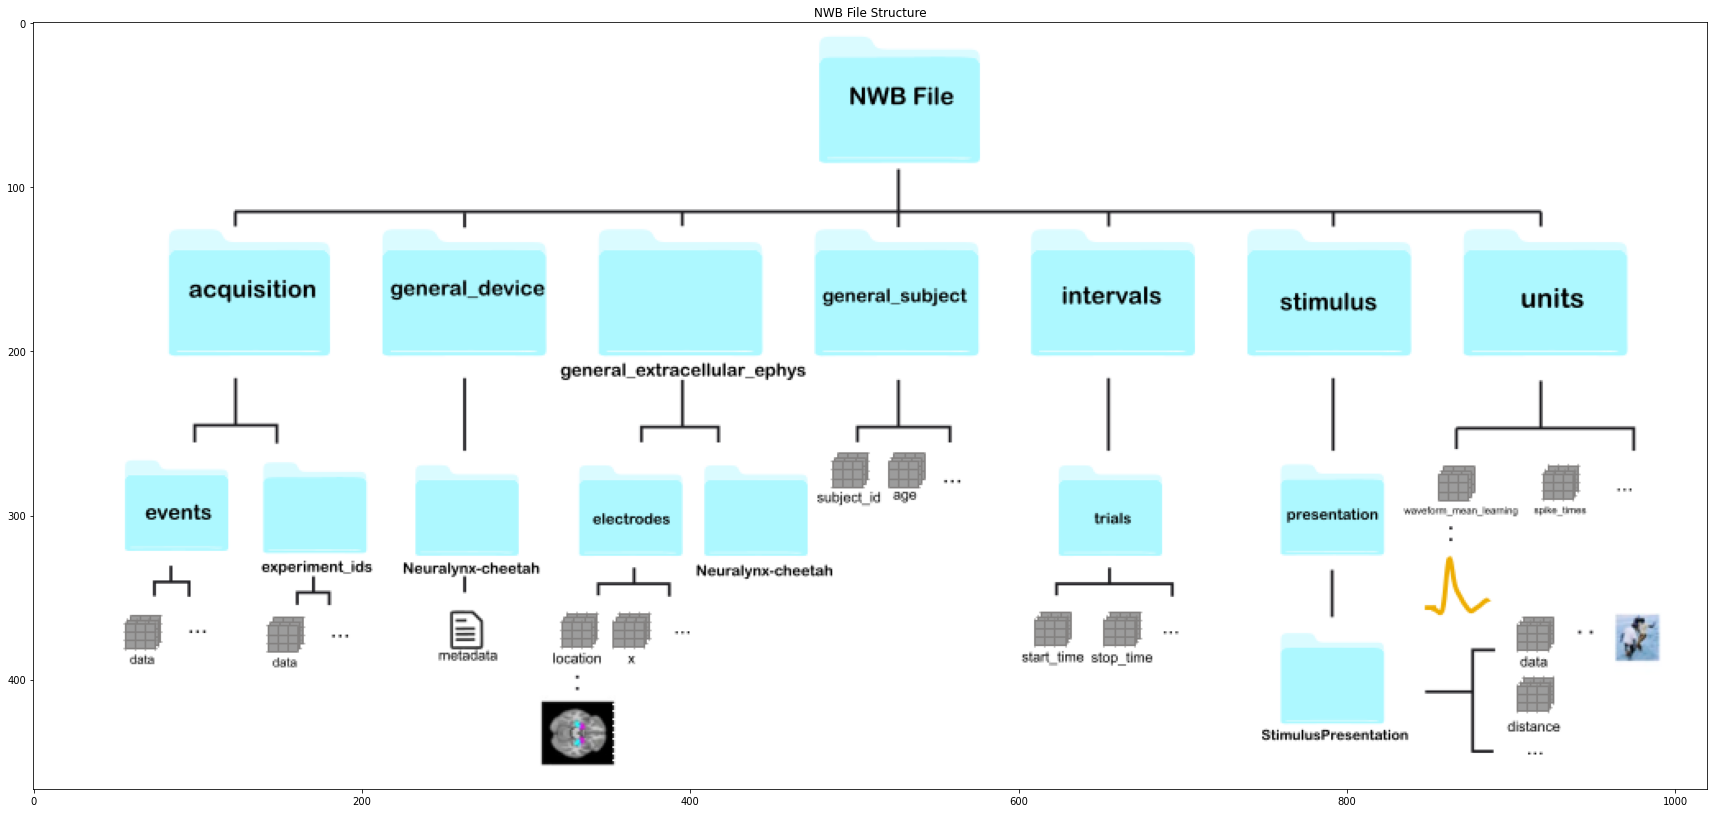

In [2]:
from matplotlib import pyplot as plt

figsize=(15, 7)
plt.figure(figsize=(30,20))
plt.title('NWB File Structure')
plt.imshow(struct_image)
plt.show()

As shown in the figure, the NWB file at the top level consists of some main groups, which act as a container for different subsets of the data. Each group is of type NWBContainer. Within these groups exist dataset specification, represented by the type NWBData. Other base types, like Image, VectorData etc inherit NWBData.
Meta-data, like text descriptions is stored using variious meta-data fields present withing the NWB:N file.


### Analyzing the individual groups in NWB File

#### Acquisition group

The group contains two streams, events and experiment ids, which include same number of entries in the same order. This is basically the raw and meta data collected for each session, which is required to align behavioral markers with the processed data.
\Events stores data and timestamps along with a meta-data field that contains the meaning of behavorial markers.
Data stores the event markers (i.e. TTLs). In this case, following TTL Values are used:

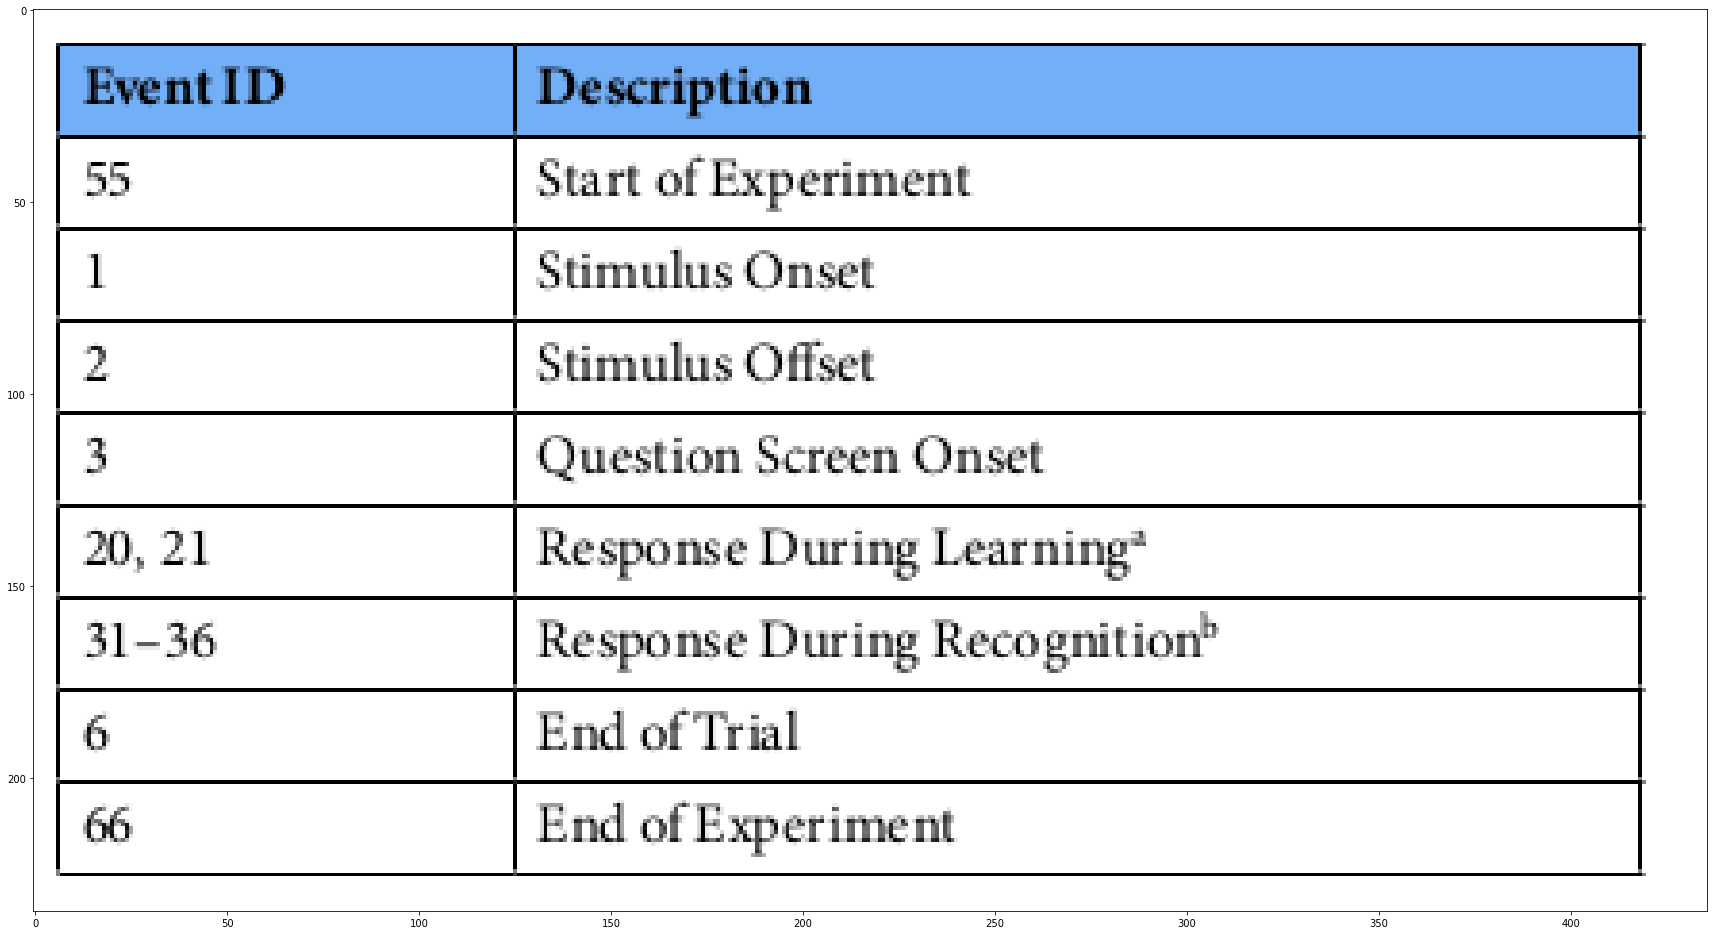

In [3]:
TTLS_image=cv2.imread("pictures/TTLs.png")
plt.figure(figsize=(30,20))
plt.imshow(TTLS_image)
plt.show()

#### General Group

This group mainly contains metadata about the experiment, like devices etc, as seen in file structure figure.

#### Interval Group

This group contains information about individual trials in the field trials. There is one entry for each trial. Attributes: such as start_time, stop_time which describe onset and offset of stimulus.
Delay1_time denotes the time of question screen inset, delay2_time indicates end of the trial, while response_time records the time the subject provided a response. Remaining attributes provide additional information about each trial.

#### Stimuli group

Note that images were given to learn and recognise, these are stored in this group as stimuli_learn_x and stimuli_recog_x

#### Units group

Here, units signify single neurons. This group contains such units after spike sorting, including electrophysiological features. Structure and existence of different columns is shown in the following figure.

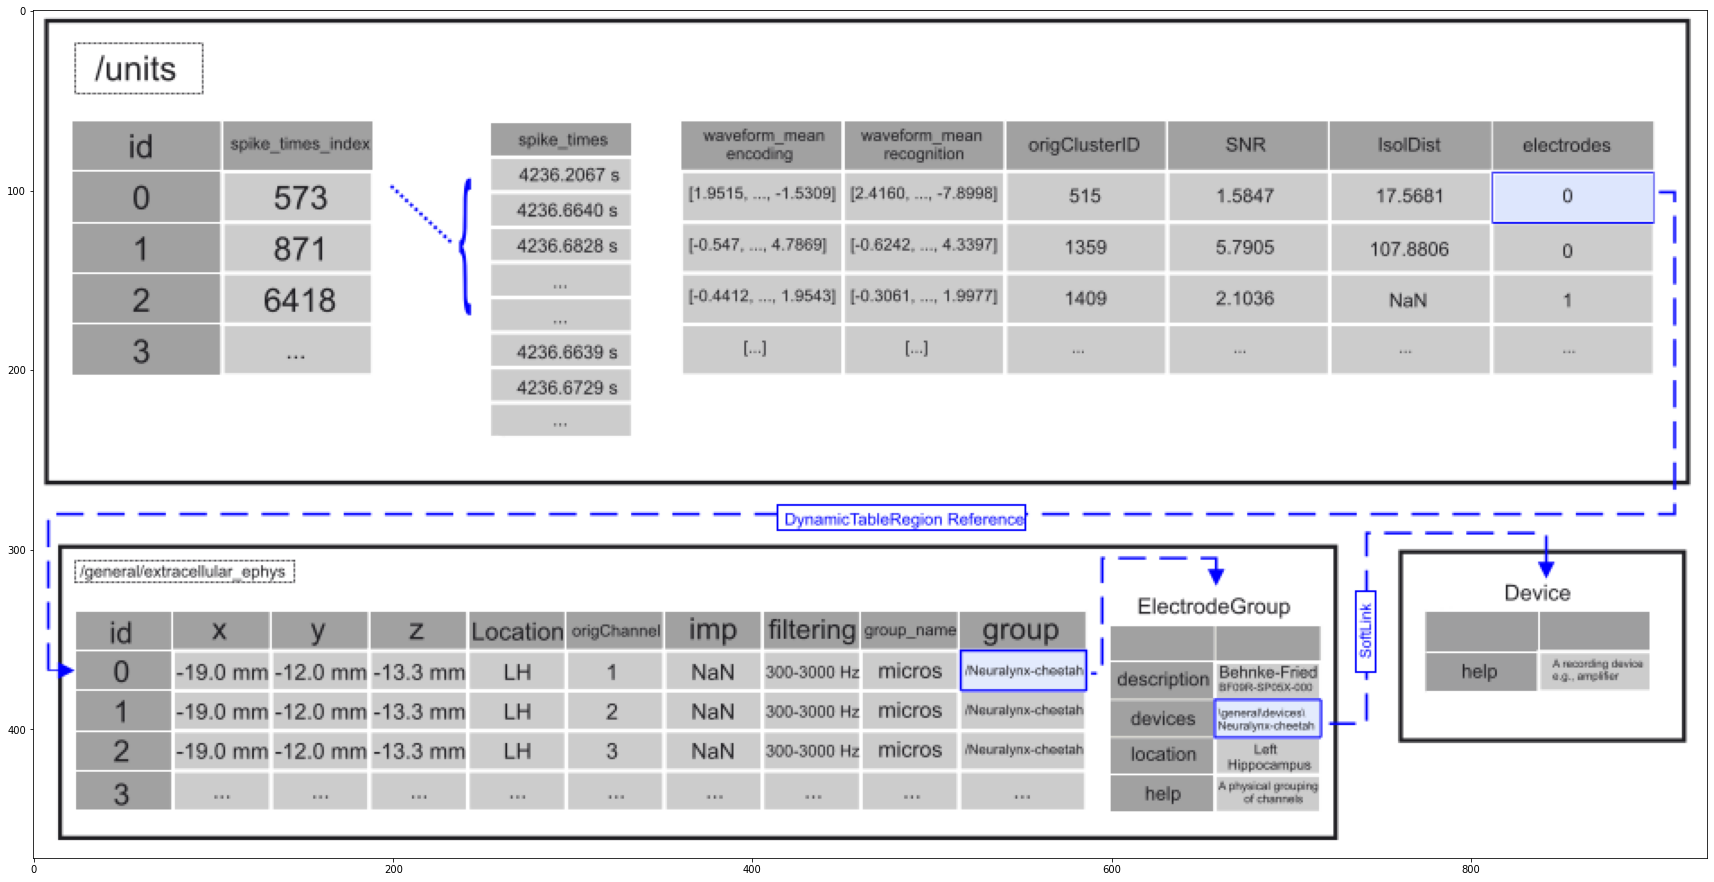

In [4]:
TTLS_image=cv2.imread("pictures/units.png")
plt.figure(figsize=(30,20))
plt.imshow(TTLS_image)
plt.show()